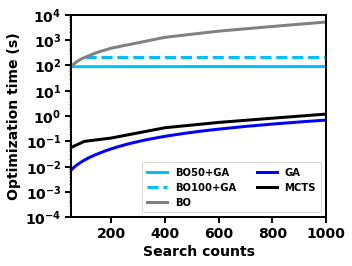

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def read_log(path):
    x_values = []
    y_values = []
    with open(path, 'r') as file:
        for line in file:
            data = line.strip().split()
            x_values.append(float(data[0]))
            y_values.append(float(data[1]))
    return np.array(x_values), np.array(y_values)

BOfile_path = r'../../../4-comparison/3-time/4BO/finalmean.log'
GA50file_path = r'./1-50/finalmean.log'
GA100file_path = r'./2-100/finalmean.log'
GAfile_path = r'../../../4-comparison/3-time/1GA/finalmean.log'
MCTSfile_path = r'../../../4-comparison/3-time/5MCTS/finalmean.log'

BOx, BOy = read_log(BOfile_path)
GA50x, GA50y = read_log(GA50file_path)
GA100x, GA100y = read_log(GA100file_path)
GAx, GAy = read_log(GAfile_path)
MCx, MCy = read_log(MCTSfile_path)
BO50time = 22.0
BO100time = 52.0

plt.figure(figsize=(5, 3.8))
sns.lineplot(x=GA50x[50:], y=GA50y[50:]*2+BO50time*4, label='BO50+GA', linewidth=3, color=(0, 191/255, 1))
sns.lineplot(x=GA100x[100:], y=GA100y[100:]*2+BO100time*4, label='BO100+GA', linewidth=3, color=(0, 191/255, 1), linestyle='--')
sns.lineplot(x=GAx[50:], y=GAy[50:]*2, label='GA', linewidth=3, color='blue')
sns.lineplot(x=MCx, y=MCy, label='MCTS', linewidth=3, color='black')
sns.lineplot(x=BOx, y=BOy*4, label='BO', linewidth=3, color='grey')
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 1, 4, 2, 3]
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]
legend = plt.legend(handles, labels, loc='lower right', ncol=2, borderpad=0.5, prop={'weight':'bold'})

plt.xlim(50, 1000)
plt.ylim(1e-4, 1E4)
plt.yscale('log')
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.tick_params(axis='both', which='major', width=2, length=6)
plt.xticks(fontsize=14,fontweight='bold')
plt.yticks(fontsize=14,fontweight='bold')

plt.xlabel('Search counts', fontsize=14, fontweight='bold')
plt.ylabel('Optimization time (s)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('1Coretime.jpg', dpi=800)
plt.show()